**This dataset contains about 1000 images of pizza and 1000 images of dishes other than pizza. It can be used for a simple binary image classification task. There are two folders from where i will be reading data. Pizza - contains the images of the pizza. not_pizza - contains the images of not a pizza.**

In [105]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import random
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [106]:
pizza_path = os.listdir("pizza") # reading the images and making a list
not_pizza_path = os.listdir("not_pizza")

In [143]:
import os
import cv2

# Define the directory paths
pizza_directory = "pizza"
not_pizza_directory = "not_pizza"

pizza_filenames = os.listdir(pizza_directory)
not_pizza_filenames = os.listdir(not_pizza_directory)

# Function to get dimensions of images
def print_image_dimensions(directory, filenames):
    for filename in filenames:
        #image using OpenCV
        image = cv2.imread(os.path.join(directory, filename))
        if image is not None:
            # Get the dimensions of the image
            height, width, channels = image.shape
            print(f"Image: {filename} - Dimensions: {height} x {width} x {channels}")

print("Dimensions of images in the pizza directory:")
print_image_dimensions(pizza_directory, pizza_filenames)
print("\nDimensions of images in the not_pizza directory:")
print_image_dimensions(not_pizza_directory, not_pizza_filenames)


Dimensions of images in the pizza directory:
Image: 1001116.jpg - Dimensions: 512 x 512 x 3
Image: 1008104.jpg - Dimensions: 384 x 512 x 3
Image: 1008144.jpg - Dimensions: 512 x 512 x 3
Image: 1008844.jpg - Dimensions: 512 x 512 x 3
Image: 1008941.jpg - Dimensions: 385 x 512 x 3
Image: 1011404.jpg - Dimensions: 384 x 512 x 3
Image: 102037.jpg - Dimensions: 446 x 512 x 3
Image: 1026922.jpg - Dimensions: 306 x 512 x 3
Image: 1029698.jpg - Dimensions: 512 x 512 x 3
Image: 1032754.jpg - Dimensions: 340 x 512 x 3
Image: 1033251.jpg - Dimensions: 512 x 512 x 3
Image: 1035854.jpg - Dimensions: 512 x 512 x 3
Image: 103708.jpg - Dimensions: 342 x 512 x 3
Image: 1038357.jpg - Dimensions: 512 x 287 x 3
Image: 1040878.jpg - Dimensions: 512 x 512 x 3
Image: 1044524.jpg - Dimensions: 512 x 512 x 3
Image: 1044789.jpg - Dimensions: 512 x 512 x 3
Image: 1048649.jpg - Dimensions: 512 x 512 x 3
Image: 1054420.jpg - Dimensions: 512 x 306 x 3
Image: 1055065.jpg - Dimensions: 384 x 512 x 3
Image: 105910.jpg

In [107]:
# It is a balanced dataset

print("No of pizza images: ", len(pizza_path))
print("No of non-pizza images: ", len(not_pizza_path))

No of pizza images:  983
No of non-pizza images:  983


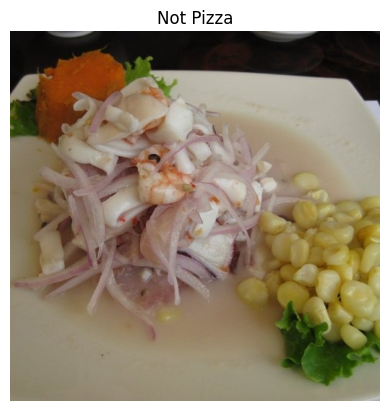

In [108]:
random_index = random.randint(0, 983)
if random.randint(0, 2) == 0:
    image_path = os.path.join("pizza/", pizza_path[random_index])
    label = "Pizza"
else:
    image_path = os.path.join("not_pizza/", not_pizza_path[random_index])
    label = "Not Pizza"
image = mimage.imread(image_path)
plt.imshow(image)
plt.title(label)
plt.axis(False)
plt.show()

In [109]:
train_data = image_dataset_from_directory(
    ".",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=39
)

valid_data = image_dataset_from_directory(
    ".",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    shuffle=False,
    subset="validation",
    seed=39
)

Found 1966 files belonging to 2 classes.
Using 1573 files for training.
Found 1966 files belonging to 2 classes.
Using 393 files for validation.


In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to load and flatten images from a directory
def load_and_flatten_images_from_directory(directory, target_size=(224, 224)):
    image_files = [file for file in os.listdir(directory) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

    images = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = plt.imread(image_path)
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize the image
            img_array = img.flatten()  # Flatten the image into a 1D array
            images.append(img_array)

    return np.array(images)

# please ignore the repetative code as i have reread multiple times for practice purposes , Directory paths for pizza and not_pizza
pizza_folder_path = './pizza'
not_pizza_folder_path = './not_pizza'

images_pizza = load_and_flatten_images_from_directory(pizza_folder_path)
images_not_pizza = load_and_flatten_images_from_directory(not_pizza_folder_path)

# Combine images from both categories
all_images = np.concatenate([images_pizza, images_not_pizza])
# Standardize the image data
scaler = StandardScaler()
scaled_images = scaler.fit_transform(all_images)



# Apply PCA
pca = PCA(n_components=0.90)
pca.fit(scaled_images)
# Determine the number of components needed to preserve 90% of the variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
num_components_90_percent_variance = np.argmax(explained_variance_ratio_cumsum >= 0.9) + 1

print("Number of components to preserve 90% of the variance:", num_components_90_percent_variance)


Number of components to preserve 90% of the variance: 474


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

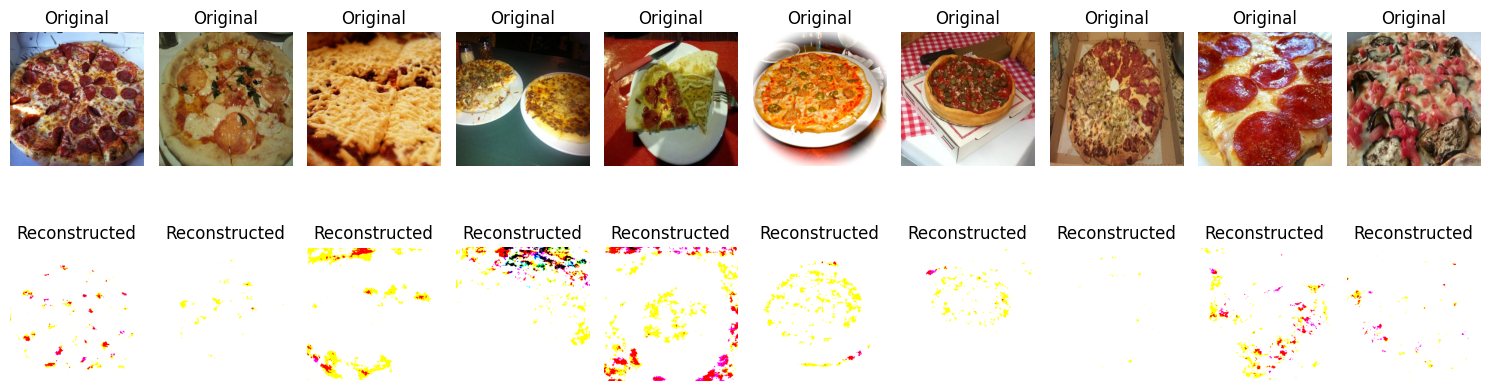

In [111]:
# Plot original and reconstructed images side by side
plt.figure(figsize=(15, 5))
for i in range(10):
    # Plot original images
    plt.subplot(2, 10, i + 1)
    plt.imshow(chosen_images[i].reshape(224, 224, 3))  # Reshape the flattened image
    plt.title('Original')
    plt.axis('off')

    # Plot reconstructed images
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(224, 224, 3))  # Reshape the flattened image
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


Variance explained by the first two principal components: 23.27%


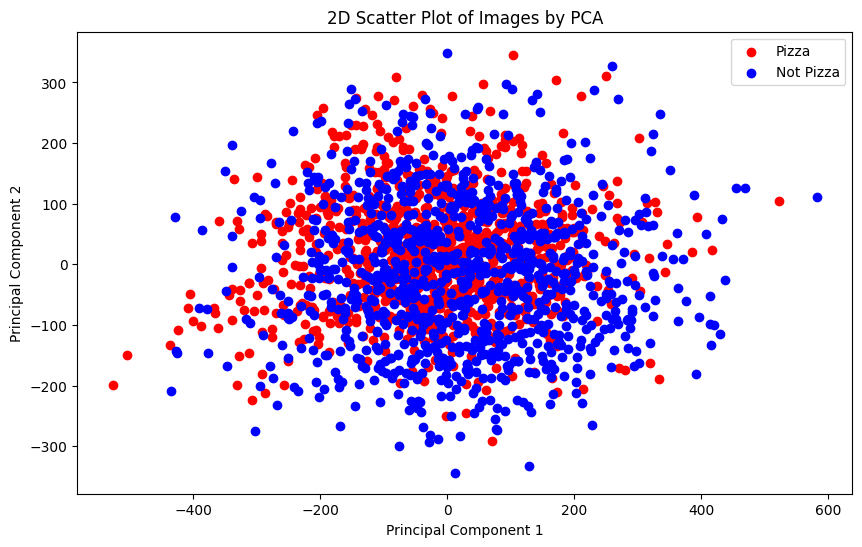

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality to 2 dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(scaled_images)

# Calculate the variance explained by the first two principal components
explained_variance_ratio_2d = pca_2d.explained_variance_ratio_
variance_explained_2d = np.sum(explained_variance_ratio_2d)
print(f"Variance explained by the first two principal components: {variance_explained_2d * 100:.2f}%")

# Project the images onto the first two principal components
projected_images_2d = pca_2d.transform(scaled_images)

# Plot a 2D scatter plot of the images spanned by the first two principal components
plt.figure(figsize=(10, 6))

# Plot "Pizza" images
plt.scatter(projected_images_2d[:len(images_pizza), 0], projected_images_2d[:len(images_pizza), 1], color='red', label='Pizza')

# Plot "Not Pizza" images
plt.scatter(projected_images_2d[len(images_pizza):, 0], projected_images_2d[len(images_pizza):, 1], color='blue', label='Not Pizza')

plt.title('2D Scatter Plot of Images by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**Variance explained by the first two principal components: 23.27%**

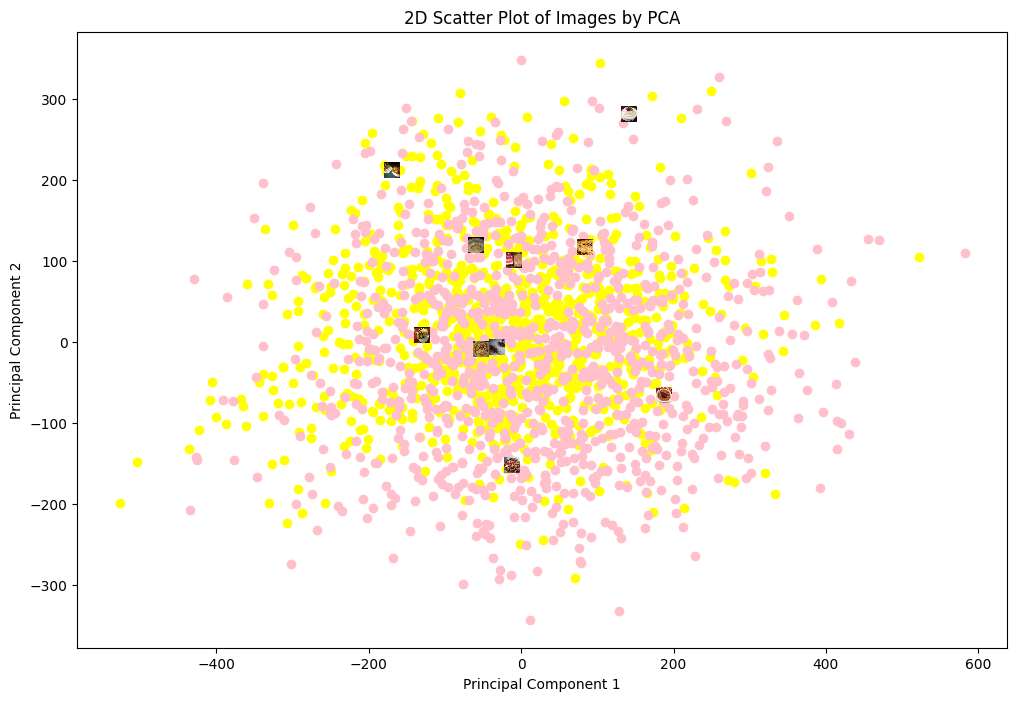

In [113]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Plot a 2D scatter plot of the images spanned by the first two principal components
plt.figure(figsize=(12, 8))

# Plot "Pizza" images
for i in range(len(images_pizza)):
    plt.scatter(projected_images_2d[i, 0], projected_images_2d[i, 1], color='yellow')

# Plot "Not Pizza" images
for i in range(len(images_not_pizza)):
    plt.scatter(projected_images_2d[len(images_pizza) + i, 0], projected_images_2d[len(images_pizza) + i, 1], color='pink')

# Add some pizza images to the scatter plot
for i in range(5):  # Add 5 pizza images
    img_pizza = images_pizza[i].reshape(224, 224, 3)  # Reshape flattened image
    imagebox_pizza = OffsetImage(img_pizza, zoom=0.05)
    ab_pizza = AnnotationBbox(imagebox_pizza, projected_images_2d[i], frameon=False, pad=0.2)
    plt.gca().add_artist(ab_pizza)

# Add some non-pizza images to the scatter plot
for i in range(5):  # Add 5 non-pizza images
    img_not_pizza = images_not_pizza[i].reshape(224, 224, 3)  # Reshape flattened image
    imagebox_not_pizza = OffsetImage(img_not_pizza, zoom=0.05)
    ab_not_pizza = AnnotationBbox(imagebox_not_pizza, projected_images_2d[len(images_pizza) + i], frameon=False, pad=0.2)
    plt.gca().add_artist(ab_not_pizza)

plt.title('2D Scatter Plot of Images by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


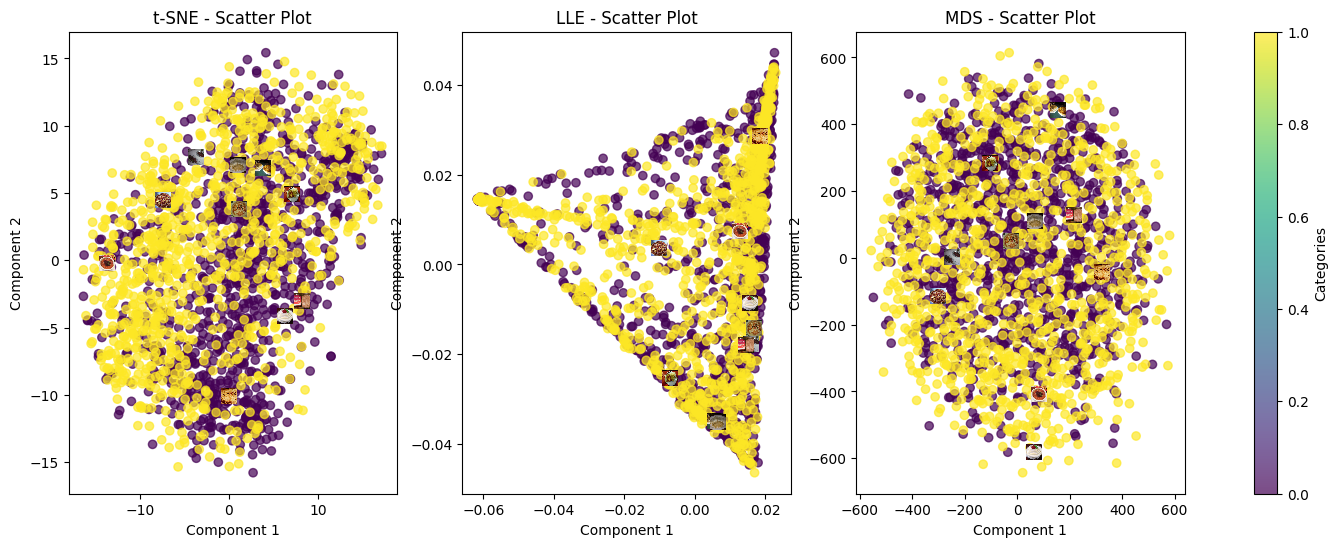

In [114]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_images)

# Apply LLE to reduce dimensionality to 2 dimensions
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(scaled_images)

# Apply MDS to reduce dimensionality to 2 dimensions
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(scaled_images)

# Map categories to numeric values for coloring
numeric_categories = np.concatenate([np.zeros(len(images_pizza)), np.ones(len(images_not_pizza))])

# Create subplots for each dimensionality reduction technique
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, X_transformed, title in zip(axes, [X_tsne, X_lle, X_mds], ['t-SNE', 'LLE', 'MDS']):
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_categories, cmap='viridis', alpha=0.7)
    ax.set_title(f'{title} - Scatter Plot')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

    # Adding some pizza images to the scatter plot
    for i in range(5):  # Add 5 pizza images
        img_pizza = images_pizza[i].reshape(224, 224, 3)  # Reshape flattened image
        imagebox_pizza = OffsetImage(img_pizza, zoom=0.05)
        ab_pizza = AnnotationBbox(imagebox_pizza, X_transformed[i], frameon=False, pad=0.2)
        ax.add_artist(ab_pizza)

    # Adding some non-pizza images to the scatter plot
    for i in range(5):  # Add 5 non-pizza images
        img_not_pizza = images_not_pizza[i].reshape(224, 224, 3)  # Reshape flattened image
        imagebox_not_pizza = OffsetImage(img_not_pizza, zoom=0.05)
        ab_not_pizza = AnnotationBbox(imagebox_not_pizza, X_transformed[len(images_pizza) + i], frameon=False, pad=0.2)
        ax.add_artist(ab_not_pizza)

# Add a colorbar to the last subplot
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', label='Categories')

plt.show()


**t-SNE Plot:The t-SNE plot exhibits a more overlapping distribution of data points.Clusters are not well-defined, suggesting that the data may have complex relationships. Points are scattered across the plot.**

**LLE Plot: data points are aligned along a gradient, forming a triangular shape.This indicates a strong underlying structure in the data.The gradient says certain features are influencing the data**

**MDS Plot: the MDS plot also shows a diffuse distribution of points. However, there is less overlap compared to t-SNE.The color gradient remains consistent, indicating varying categories or values associated with the data points.T-SNE seems to be good here.**

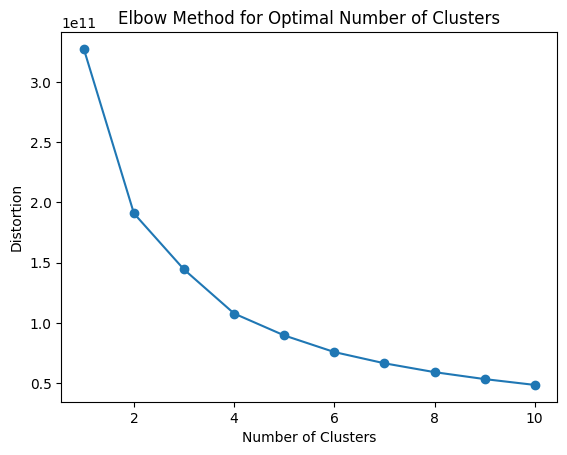

In [117]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
X = np.array(images)
X_flattened = X.reshape(X.shape[0], -1)
# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

distortions = []
max_clusters = 10 

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


**Based on the plot above I beleive that the right numbr of clusters can be 2 or 3. I will further use silhoutte co-efficient and diagram to check the best number of clusters as we did in the lecture**

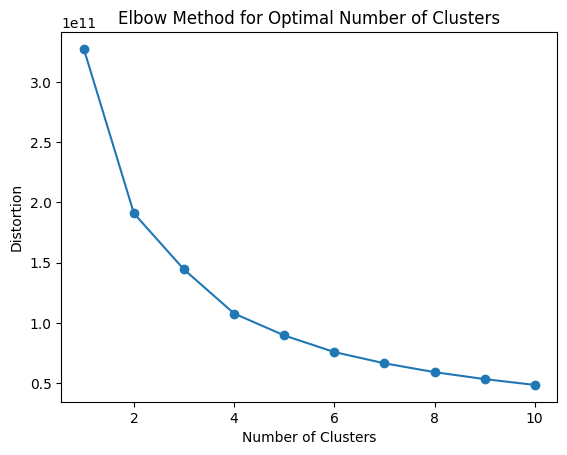

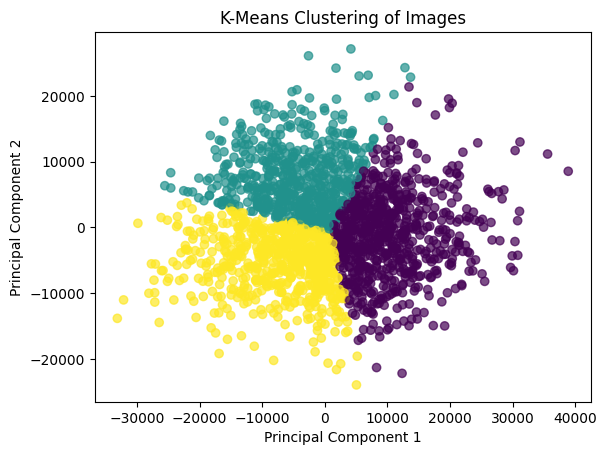

Silhouette Score: 0.3305979371070862


In [120]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Convert the list of images to a 2D NumPy array
X = np.array(images)
X_flattened = X.reshape(X.shape[0], -1)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

# Determine the number of clusters using the elbow method
distortions = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Choose the number of clusters based on the elbow point
optimal_num_clusters = 3

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")



**Silhoutte score of 1 means clustering is right, -1 is data points belong to wrong cluster and 0 is clusters are overlapping, from the above we can see that out silhoutte co-efficient is around 0.33, close to 0**

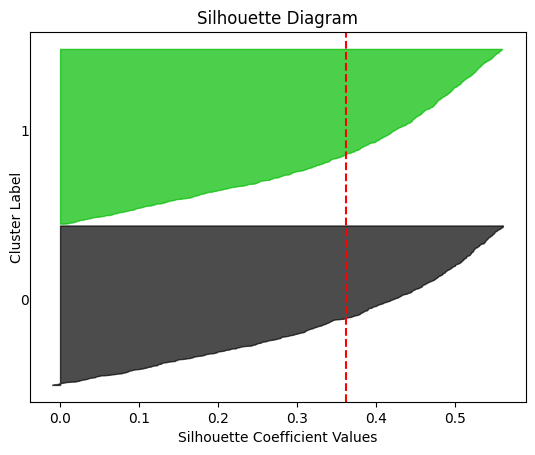

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Flatten each image
X_flattened = X.reshape(X.shape[0], -1)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

# Determine the number of clusters using silhouette coefficient
silhouette_scores = []

for i in range(2, 7):  # We'll check for 2 to 7 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette diagram for the optimal number of clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 to account for starting from 2 clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)
silhouette_vals = silhouette_samples(X_pca, clusters)

y_lower = 10
for i in range(optimal_num_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = cm.nipy_spectral(float(i) / optimal_num_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10
plt.title('Silhouette Diagram')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
plt.yticks([])
plt.show()



**From the above diagram it is very clear that the optimal number of clusters to consider is 2** 

In [152]:
#  the optimal number of clusters from the above silhoutte is 2
optimal_num_clusters = 2 

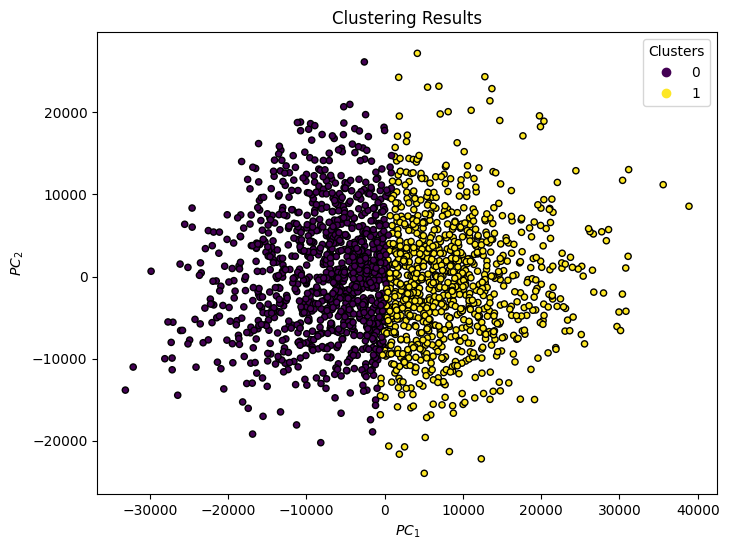

In [154]:
import cv2
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the list of images to a 2D NumPy array
X = np.array(images)

# Reshape the array if it has more than two dimensions
if X.ndim > 2:
    num_samples = X.shape[0]
    num_features = np.prod(X.shape[1:])
    X = X.reshape(num_samples, num_features)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="viridis", edgecolor='k', s=20)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel("$PC_1$")
plt.ylabel("$PC_2$")
plt.title("Clustering Results")
plt.show()


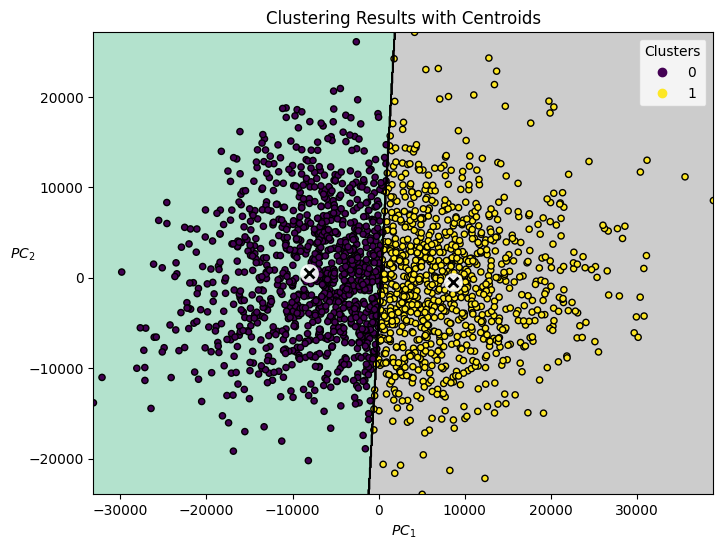

In [156]:

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, labels=None):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, labels)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_data(X, labels):
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels.astype(float), cmap="viridis", edgecolor='k', s=20)
    plt.legend(*scatter.legend_elements(), title="Clusters")

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

# Convert the list of images to a 2D NumPy array
X = np.array(images)

# Reshape the array if it has more than two dimensions
if X.ndim > 2:
    num_samples = X.shape[0]
    num_features = np.prod(X.shape[1:])
    X = X.reshape(num_samples, num_features)

# Convert data type to double
X = X.astype(np.double)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(X_pca)

# Plot decision boundaries and centroids with color mapping
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X_pca, labels=kmeans.labels_)
plt.xlabel("$PC_1$")
plt.ylabel("$PC_2$")
plt.title("Clustering Results with Centroids")
plt.show()


Optimal number of clusters: 2


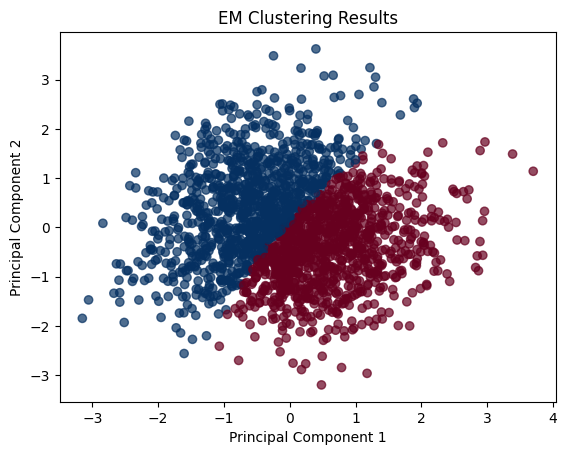

In [165]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'images' contains your data
X = np.array(images)

# Reshape if the array has more than two dimensions
if len(X.shape) > 2:
    X = X.reshape(X.shape[0], -1)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Standardize the data (optional but can be beneficial for GMM)
scaler = StandardScaler()
X_pca_standardized = scaler.fit_transform(X_pca)

# Determine the number of clusters using the Bayesian Information Criterion (BIC)
n_components_range = range(2, 11)  # Adjust the range based on your expectations
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=2)
    gmm.fit(X_pca_standardized)
    bic_scores.append(gmm.bic(X_pca_standardized))

# Find the number of components that minimizes the BIC score
optimal_n_components = n_components_range[np.argmin(bic_scores)]

print(f"Optimal number of clusters: {optimal_n_components}")
# Perform EM clustering with 2 components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=2)
gmm.fit(X_pca_standardized)

# Plot the results
plt.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], c=gmm.predict(X_pca_standardized), cmap='RdBu_r', alpha=0.7)
plt.title('EM Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


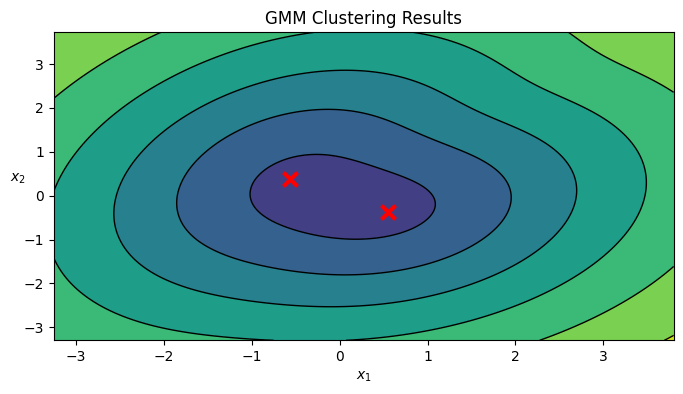

In [166]:
from matplotlib.colors import LogNorm

def plot_gmm_decision_boundaries(gmm, X, resolution=1000, show_centroids=True,
                                  show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    if show_centroids:
        plot_gmm_centroids(gmm)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_gmm_centroids(gmm):
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
                s=100, marker='x', linewidths=3,
                color='r', zorder=10)

# Use the previously obtained optimal_n_components and gmm
gmm = GaussianMixture(n_components=optimal_n_components, random_state=2)
gmm.fit(X_pca_standardized)

# Plot the GMM clustering results with decision boundaries
plt.figure(figsize=(8, 4))
plot_gmm_decision_boundaries(gmm, X_pca_standardized)
plt.title('GMM Clustering Results')
plt.show()

In [125]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the list of images to a 2D NumPy array
X = np.array(images)

# Apply PCA to reduce dimensionality to keep at least 90% of the variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X.reshape(X.shape[0], -1))

# Standardize the data (optional but can be beneficial for GMM)
scaler = StandardScaler()
X_pca_standardized = scaler.fit_transform(X_pca)

# Perform EM clustering with the optimal number of clusters (set to 3)
gmm = GaussianMixture(n_components=3, random_state=2)
gmm.fit(X_pca_standardized)

# Plot the generated rocks
plt.figure(figsize=(15, 3))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(generated_rocks[i], cmap='gray')
    plt.axis('off')

plt.show()

GaussianMixture(n_components=3, random_state=2)

Optimal number of clusters: 1


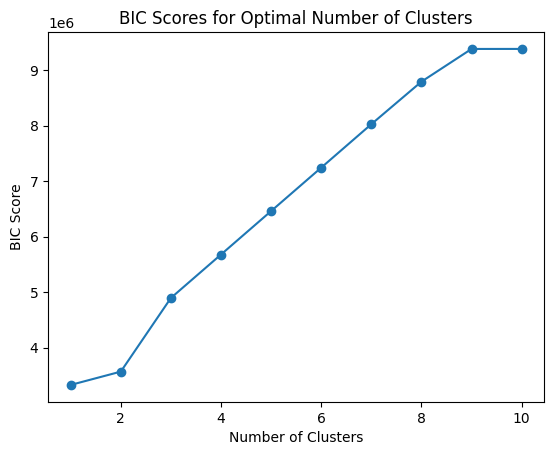

In [126]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Convert the list of images to a 2D NumPy array
X = np.array(images)

# Apply PCA to reduce dimensionality to keep at least 90% of the variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X.reshape(X.shape[0], -1))

# Standardize the data (optional but can be beneficial for GMM)
scaler = StandardScaler()
X_pca_standardized = scaler.fit_transform(X_pca)

# Determine the number of clusters using one of the techniques (BIC in this case)
n_components_range = range(2, 11)  # Adjust the range based on your expectations
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=2)
    gmm.fit(X_pca_standardized)
    bic_scores.append(gmm.bic(X_pca_standardized))

# Find the number of components that minimizes the BIC score
optimal_n_components = n_components_range[np.argmin(bic_scores)]

print(f"Optimal number of clusters: {optimal_n_components}")

# Plot the BIC scores
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()


In [131]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Flatten each image
X_flattened = np.array([image.flatten() for image in images])

# Apply PCA to reduce dimensionality while keeping 90% of the variance
pca = PCA(0.9)
X_pca = pca.fit_transform(X_flattened)

# Standardize the data (optional but can be beneficial for GMM)
scaler = StandardScaler()
X_pca_standardized = scaler.fit_transform(X_pca)

# Determine the number of clusters using the Bayesian Information Criterion (BIC)
n_components_range = range(1, 11)  # Adjust the range based on your expectations
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=2)
    gmm.fit(X_pca_standardized)
    bic_scores.append(gmm.bic(X_pca_standardized))

# Find the number of components that minimizes the BIC score
optimal_n_components = n_components_range[np.argmin(bic_scores)]

print(f"Optimal number of clusters: {optimal_n_components}")


Optimal number of clusters: 1


Epoch 1/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5316 - loss: 1305.2753 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.5722 - loss: 446.1325 - val_accuracy: 0.2443 - val_loss: 372.8300
Epoch 3/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5833 - loss: 674.1690 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6126 - loss: 296.3722 - val_accuracy: 0.9466 - val_loss: 9.5224
Epoch 5/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6391 - loss: 154.5667 - val_accuracy: 0.9720 - val_loss: 2.9561
Epoch 6/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.6664 - loss: 123.4040 - val_accuracy: 0.9949 - val_loss: 0.4630
Epoch 7/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.6368 - loss: 162.0114 - val_accuracy: 0.1858 - val_loss: 239.0048
Epoch 8/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6621 - loss

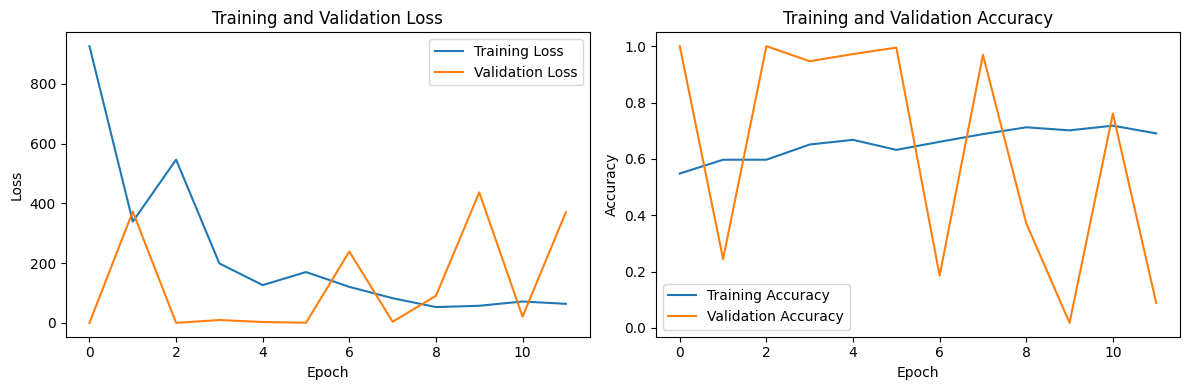

Total parameters: 19278330
Bias parameters: 234


In [132]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=12)

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate total parameters and bias parameters
total_params = model.count_params()
bias_params = sum([p.numpy().size for p in model.trainable_variables if len(p.shape) == 1])

print("Total parameters:", total_params)
print("Bias parameters:", bias_params)


**Solution :**<br>
Accuracy is : 71% with train time: 108ms/step<br>
[ 108ms/step - accuracy: 0.7180 - loss: 47.6897 - val_accuracy: 0.0891 - val_loss: 370.4100]<br>
Total parameters: 19278330<br>
Bias parameters: 234